# Star Classifier

This data set is downloaded from Kaggle and can be accessed at this address: https://www.kaggle.com/datasets/deepu1109/star-dataset/data. Following the documentation the features are: 

- Absolute Temperature (in K)

- Relative Luminosity (L/Lo)

- Relative Radius (R/Ro)

- Absolute Magnitude (Mv)

- Star Color (White, Red, Blue, Yellow, Yellow-Orange etc)

- Spectral Class (O,B,A,F,G,K,,M)

- Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

Lo = 3.828 x 10^26 Watts (Average Luminosity of Sun)
Ro = 6.9551 x 10^8 m (Average Radius of Sun)

The aim of this Notebook is to find the best Machine Learning technique to predict type of a star.

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## 2. Import dataset

In [2]:
df = pd.read_csv('stars_dataset.csv')

## 3. Exploratory data analysis

In [3]:
# view dimensions of dataset

df.shape

(240, 7)

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Summary of variables

- there are 5 numerical variables in the dataset.

- there are 2 categorical variables

- we want to use star type as a target variable

From the documentation we know that there are no missing values. 

In [6]:
# view frequency distribution of values in target variable

df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [7]:
# view percentage of frequency distribution of values in target variable

df['Star type'].value_counts()/float(len(df))

0    0.166667
1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
Name: Star type, dtype: float64

In [8]:
# view summary statistics in numerical variables

print(round(df.describe(),2))

       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count           240.00            240.00        240.00   
mean          10497.46         107188.36        237.16   
std            9552.43         179432.24        517.16   
min            1939.00              0.00          0.01   
25%            3344.25              0.00          0.10   
50%            5776.00              0.07          0.76   
75%           15055.50         198050.00         42.75   
max           40000.00         849420.00       1948.50   

       Absolute magnitude(Mv)  Star type  
count                  240.00     240.00  
mean                     4.38       2.50  
std                     10.53       1.71  
min                    -11.92       0.00  
25%                     -6.23       1.00  
50%                      8.31       2.50  
75%                     13.70       4.00  
max                     20.06       5.00  


## 4. Data visualisation

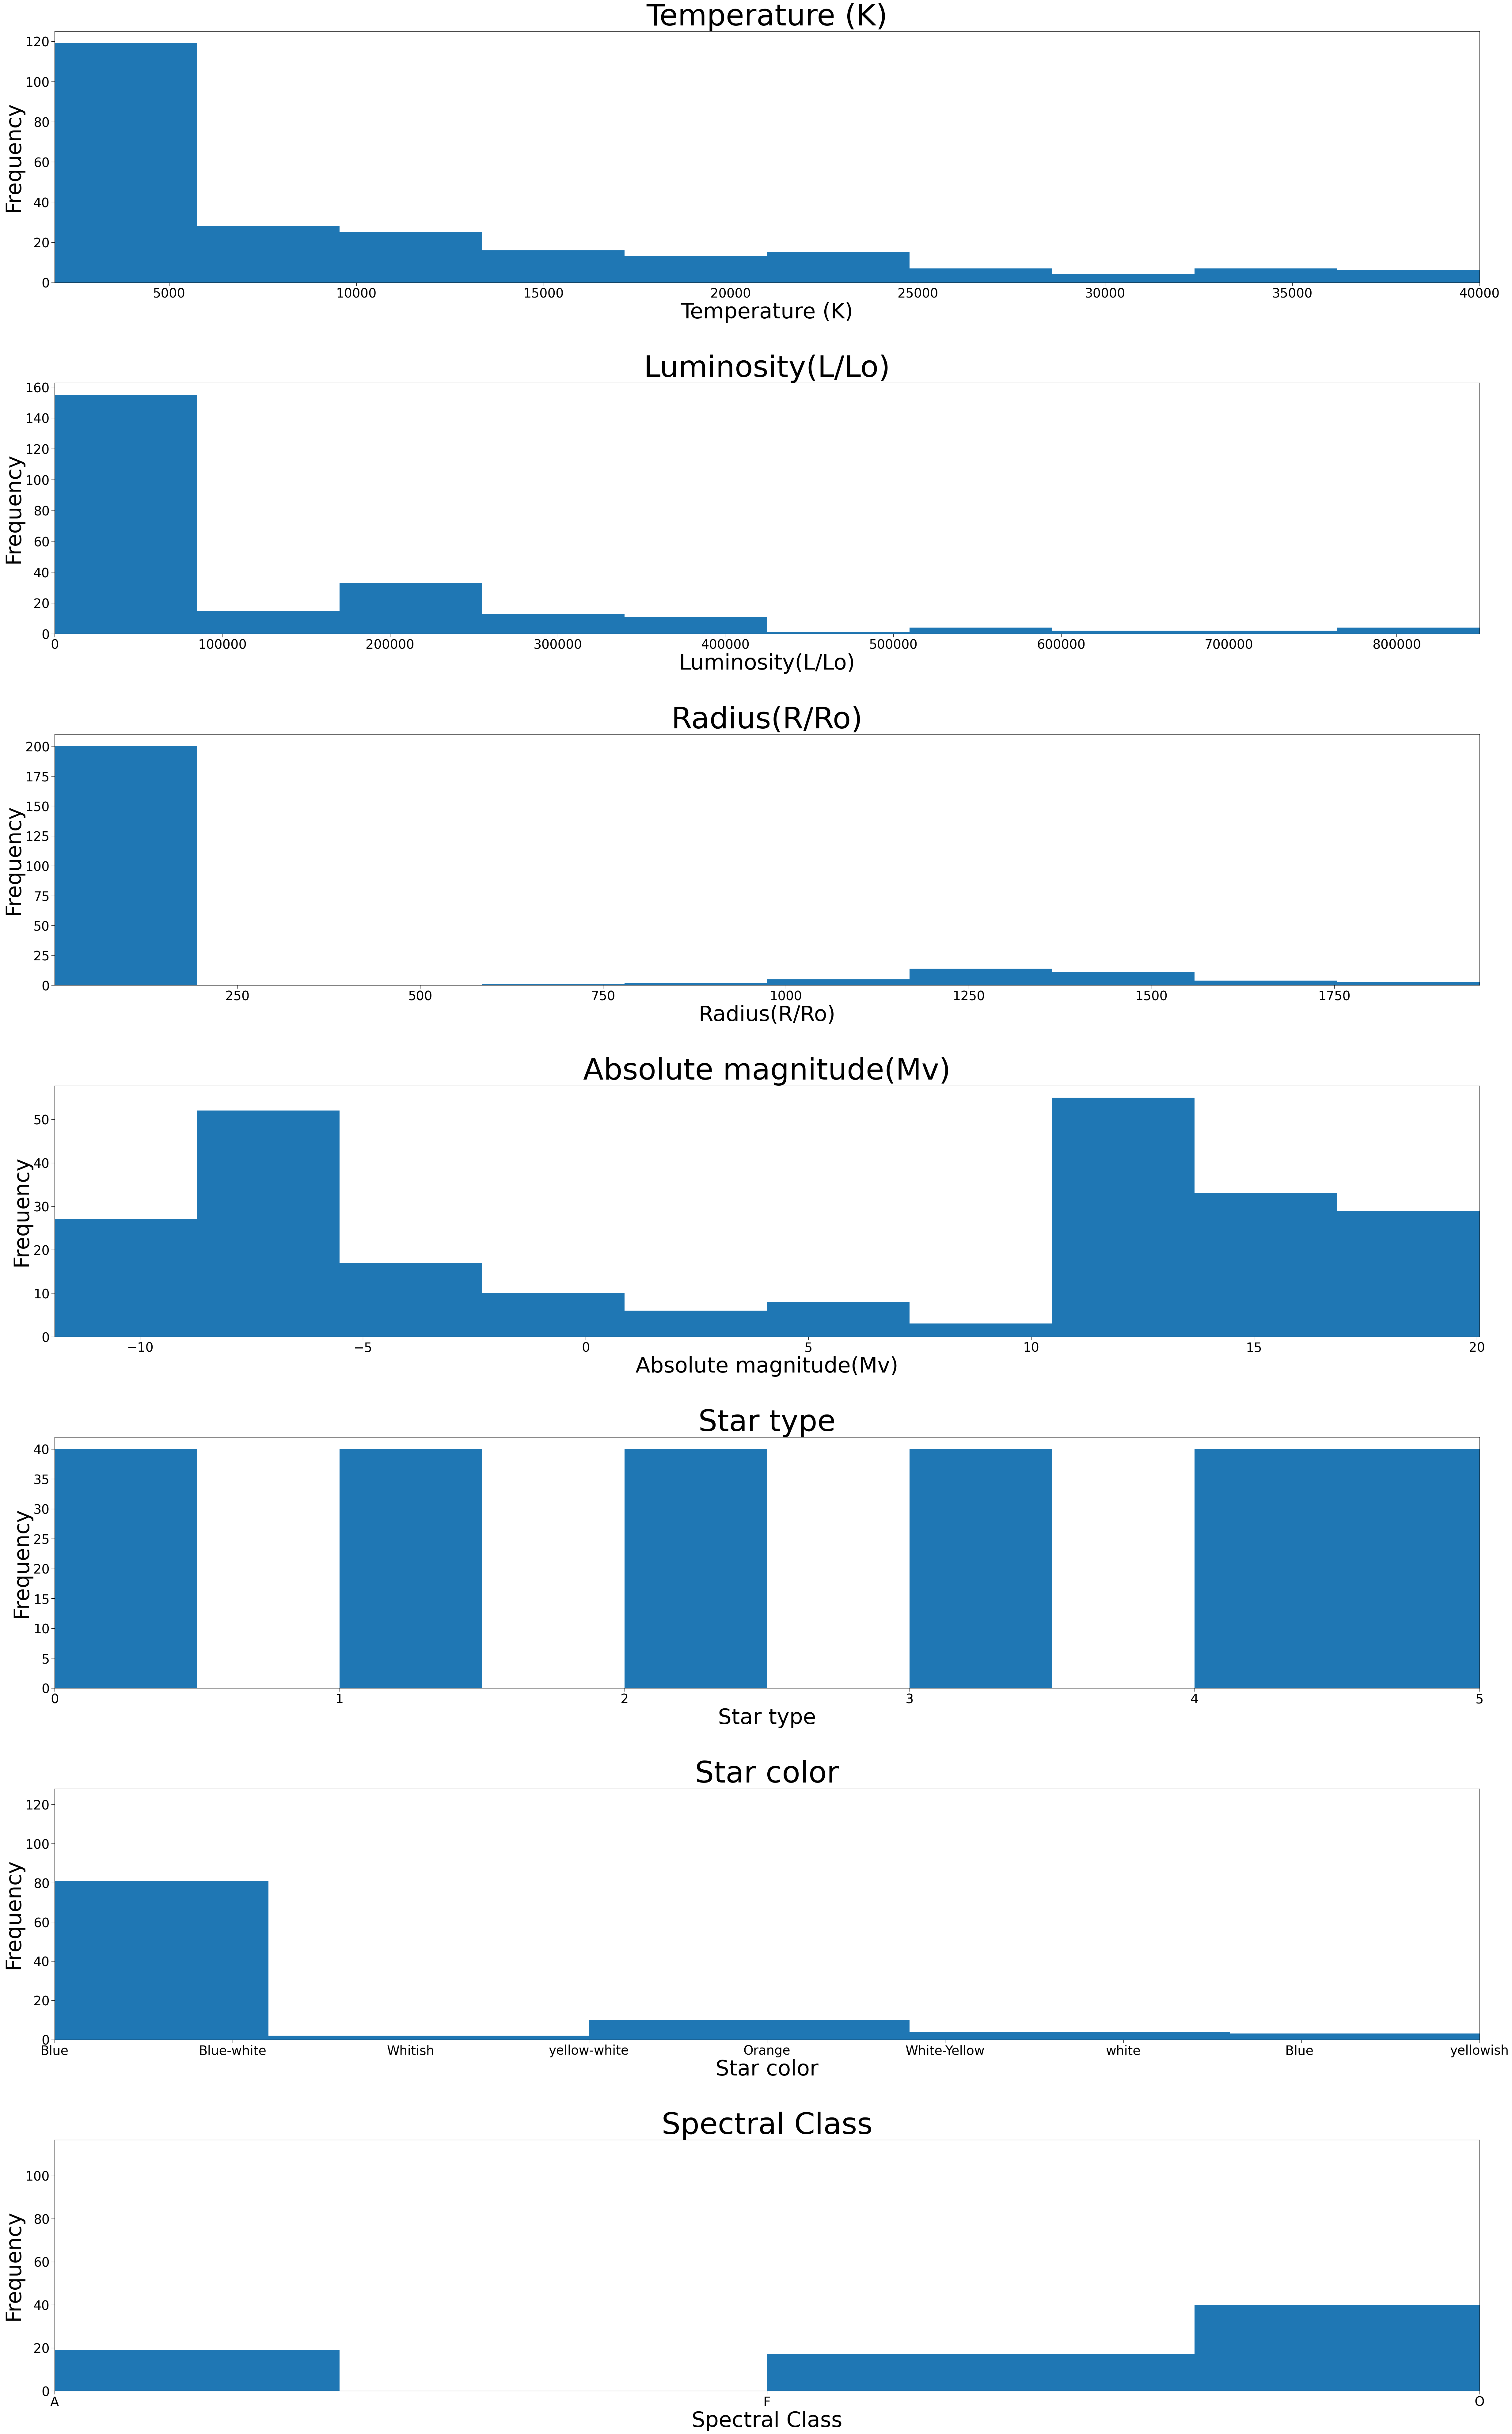

In [9]:
# plot histograms of the variables


num_subplots = df.shape[1]

# Set the number of rows and columns for subplots
num_rows = 7
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 100))

# Flatten the axes if there is more than one row
axes = axes.flatten()

# Plot histograms on each subplot
for i in range(num_subplots):
    axes[i].hist(df.iloc[:, i], bins=10)
    axes[i].set_title(df.columns[i], fontsize=70)
    axes[i].set_xlabel(df.columns[i], fontsize=50)
    axes[i].set_ylabel('Frequency', fontsize=50)
    axes[i].tick_params(axis='both', which='both', labelsize=30, size=8)

# Make plots more spaced out
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Set different x-axis scales for each subplot
for i in range(num_subplots):
    axes[i].set_xlim([df.iloc[:, i].min(), df.iloc[:, i].max()])

plt.show()

We notice that Temperature, Luminosity, Radius and Star Color are right-skewed. Absolute Magnitude is symmetrical, Star type is uniform and Spectral Class is left-skewed.

### Correlation Heat Map

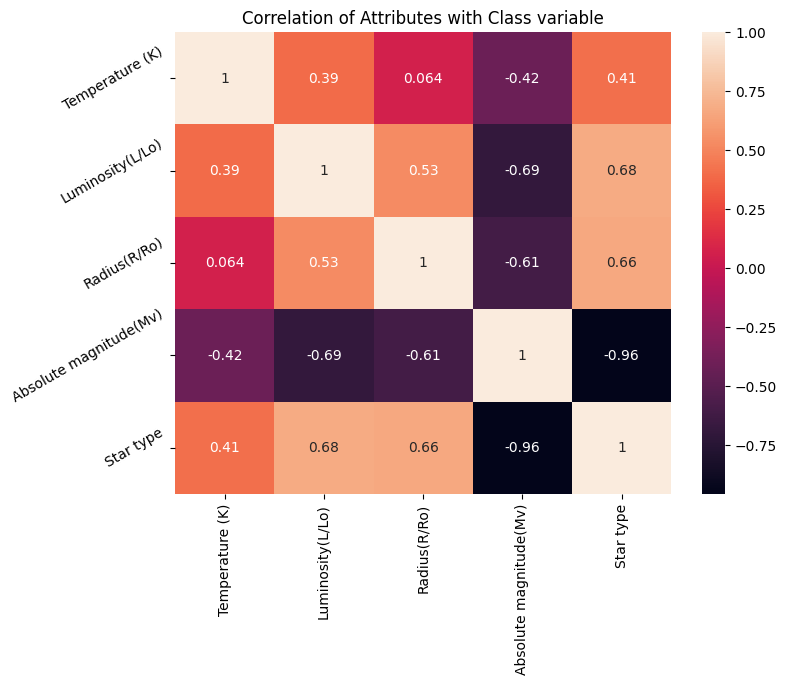

In [10]:
df_filtered = df.drop("Star color", axis=1)
df_filtered = df_filtered.drop('Spectral Class', axis=1)

plt.figure(figsize=(8,6))
plt.title('Correlation of Attributes with Class variable')
dataplot = sns.heatmap(df_filtered.corr(), annot = True)
dataplot.set_xticklabels(dataplot.get_xticklabels(), rotation=90)
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=30)           
plt.show()

### Observations:

1. Very strong negative correlation between Absolute magnitude and Star type (correlation coefficient = -0.96).

2. Moderate negative correlation between Absolute magnitude and Luminosity (correlation coefficient: -0.69) and Absolute magnitude and Radius (correlation coefficient: -0.61).

3. Moderate positive correlation between Luminosity and Star type (correlation coefficient: 0.68), between Radius and Star type (correlation coefficient: 0.66) and between Luminosity and Radius (correlation coefficient: 0.53).

4. Temperature is weakly positively correlated with Luminosity (0.39), Radius (0.64), Star Type (0.41) and it's weakly negatively correlated with Absolute magnitude (-0.42). 

### Pairplots

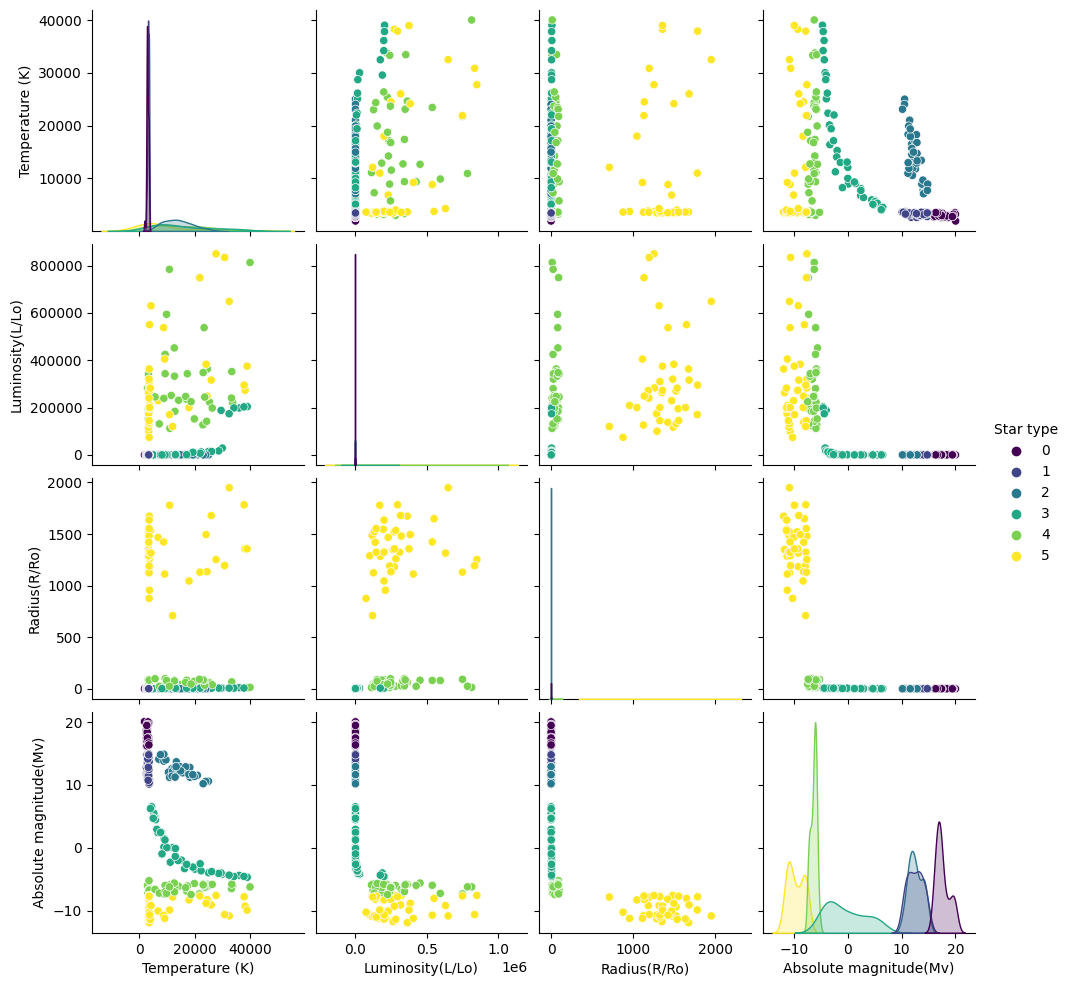

In [11]:
sns.pairplot(df, hue="Star type", palette='viridis')

### Observations: 

We can see a clear separation of data in the following plots: 

- Temperature vs Absolute magnitude

- Luminosity vs Absolute magnitude

- Radius vs Absolute magnitude

Let's plot it again: 

### Absolute magnitude vs Temperature

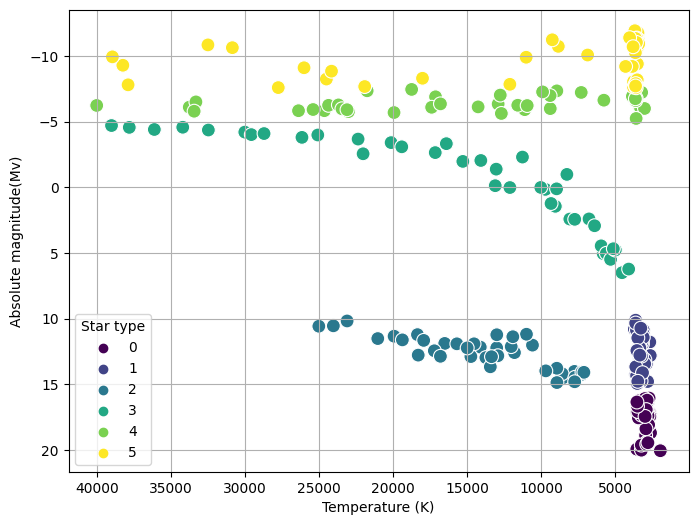

In [12]:
# Magnitude vs Temperature

plt.figure(figsize=(8, 6))

# Scatter plot 
sns.scatterplot(x=df["Temperature (K)"], y=df["Absolute magnitude(Mv)"], hue="Star type", data=df, palette='viridis', s=100)

# Axes decreasing in order to compare with HR-Diagram
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()


This plot nicely depicts the HR-diagram. 

- Points with magnitude below 15 Mv represent Brown Dwarfs

- Points with magnitude between 10 and 15 MV and Temperature below 5000 K represent Red Dwarfs

- Points with magnitude below 10 Mv and Temperature between  ~25000 and ~7000 K represent White Dwarfs

- Points on the line that goes through the magnitudes between -5 and ~7 Mv represents the main sequence 

- Points with magnitude between ~-7.5 Mv and -5 Mv represent Supergiants

- Points with magnitude above ~-7.5 Mv represent Hypergiants

We notice that there is a little bit uncertainty between Supergiants and Hypergiants.

### Absolute magnitude vs Luminosity 

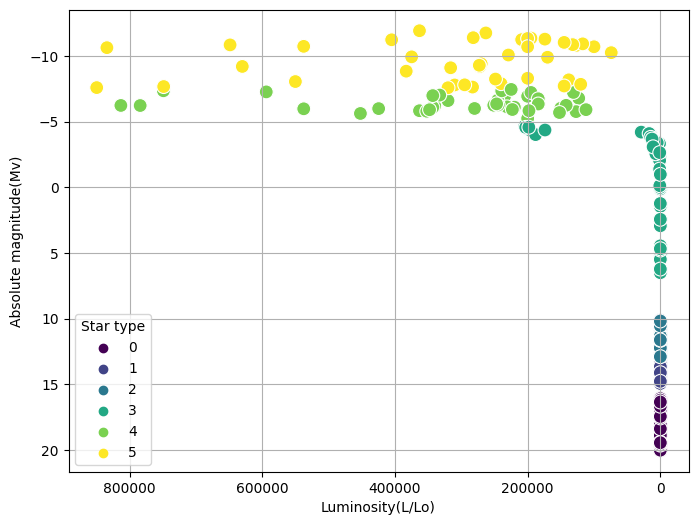

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Luminosity(L/Lo)"], y=df["Absolute magnitude(Mv)"], hue="Star type", data=df, palette='viridis', s=100)

# Axes decreasing in order to compare with HR-Diagram
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()

### Observations:

Again we can notice a good separation of data. 

- Points with Absolute magnitude below 15 Mv represent Brown Dwarfs

- Points with Absolute magnitude between 15 Mv and ~13 Mv represent Red Dwarfs

- Points with Absolute magnitude between ~13 Mv and 10 Mv represent White Dwarfs

- Points with Absolute magnitude between ~6.5 Mv and -5 Mv represent Main Sequence

- Points with Absolute magnitude between -5 Mv and ~-7.5 Mv represent Supergiants

- Points with Absolute magnitude above ~-7.5 Mv represent Hypergiants

Once again, there is a little uncertainty between Supergiants and Hypergiants.

### Radius vs Absolute magnitude

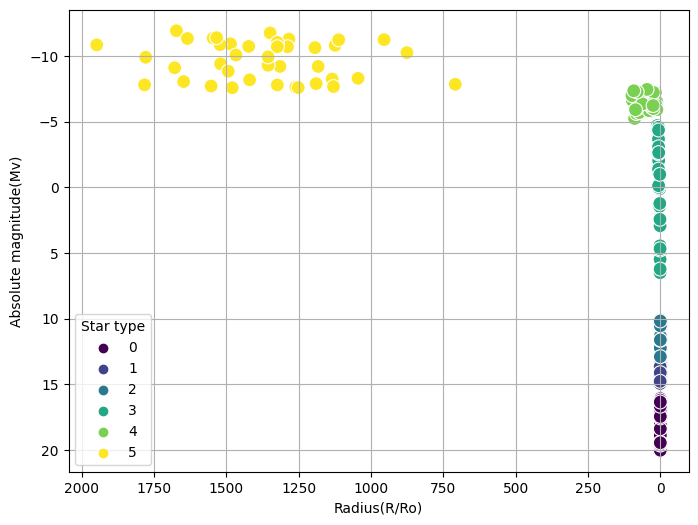

In [14]:
plt.figure(figsize=(8, 6))
# Scatter plot with both axes decreasing
sns.scatterplot(x=df["Radius(R/Ro)"], y=df["Absolute magnitude(Mv)"], hue="Star type", data=df, palette='viridis', s=100)

# Axes decreasing in order to compare with HR-Diagram
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()

### Observations:

We get a similar division of data as in the previous plot, however this time Supergiants and Hypergiants are clearly divisible! We have:

- Points with Absolute magnitude below 15 Mv represent Brown Dwarfs

- Points with Absolute magnitude between 15 Mv and ~13 Mv represent Red Dwarfs

- Points with Absolute magnitude between ~13 Mv and 10 Mv represent White Dwarfs

- Points with Absolute magnitude between ~6.5 Mv and -5 Mv represent Main Sequence

- Points with Absolute magnitude between -5 Mv and ~-8 Mv and Radius smaller than 250 R/Ro represent Supergiants 

- Points with Absolute magnitude above ~-7.5 Mv and Radius larger than 500 R/Ro represent Hypergiants

## 5. Machine Learning models

In [15]:
# Change Spectral into int
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[['M', 'B', 'A', 'F', 'O', 'K', 'G']], dtype="int")
oe.fit(df[["Spectral Class"]])
df["Spectral Class"]=oe.transform(df[["Spectral Class"]])
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,4
236,30839,834042.0,1194.0,-10.63,5,Blue,4
237,8829,537493.0,1423.0,-10.73,5,White,2
238,9235,404940.0,1112.0,-11.23,5,White,2
239,37882,294903.0,1783.0,-7.80,5,Blue,4


In [16]:
# Change Star color into int

for number, color in enumerate(df["Star color"]):
    color = color.strip()
    color = color.replace("-","")
    color = color.title()
    df["Star color"].replace(df["Star color"][number], color, inplace=True)

oe2=OrdinalEncoder(categories=[['Red', 'Blue White', 'White', 'Yellowish White',
       'Pale Yellow Orange', 'Blue', 'Bluewhite', 'Whitish',
       'Yellowwhite', 'Orange', 'Whiteyellow', 'Yellowish', 'Orangered']], dtype="int")
oe2.fit(df[["Star color"]])
df["Star color"]=oe2.transform(df[["Star color"]])
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,5,4
236,30839,834042.0,1194.0,-10.63,5,5,4
237,8829,537493.0,1423.0,-10.73,5,2,2
238,9235,404940.0,1112.0,-11.23,5,2,2
239,37882,294903.0,1783.0,-7.80,5,5,4


In [17]:
from sklearn.model_selection import train_test_split

# Split for train and test
#X = df.drop(["Star type", "Star color", "Spectral Class"], axis=1)
X = df.drop("Star type", axis=1)
y = df["Star type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"Shapes for train and test are: {X_train.shape, X_test.shape}")

Shapes for train and test are: ((192, 6), (48, 6))


### Logistic Regression

In [18]:
# Split data into train and test

X = df.drop("Star type", axis=1)
y = df["Star type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn import linear_model

# Fit the model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

# Predict the data
y_pred = logr.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import accuracy_score

# Print accuracy
acc_logr = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5833


### KNN

In [21]:
X = df.drop("Star type", axis=1)
y = df["Star type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
#Import KNeighbors Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Fit the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
# Predict 
y_pred = knn.predict(X_test)

y_pred

array([4, 1, 3, 1, 4, 4, 3, 4, 3, 0, 0, 2, 2, 3, 4, 1, 1, 4, 4, 1, 5, 4,
       2, 0, 0, 2, 1, 2, 1, 4, 5, 5, 2, 0, 2, 4, 2, 5, 0, 1, 3, 5, 3, 1,
       4, 1, 5, 0])

In [24]:
# Print accuracy
acc_knn = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Check for overfitting
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.7083
Training-set accuracy score: 1.0000


### Linear Regression Model

In [25]:
X = df.drop("Star type", axis=1)
y = df["Star type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Fit the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the data
y_pred = reg.predict(X_test)

y_pred

array([3.86522177, 1.38777385, 3.03076126, 1.28863241, 4.06443707,
       3.77946995, 3.47966268, 4.00478335, 3.42876273, 1.09008605,
       0.96008661, 1.41835039, 1.18526801, 3.46189074, 4.40082027,
       0.85796775, 0.49030162, 4.79596122, 4.13610432, 0.44632333,
       3.6227727 , 4.71728578, 1.51047989, 0.11209804, 0.50607869,
       1.27669029, 0.78792806, 3.0879893 , 0.99117603, 4.01999875,
       5.00338983, 3.34622064, 1.36228844, 0.16239092, 1.34797913,
       5.54706963, 1.02456927, 4.52602241, 0.259212  , 2.98767173,
       3.5081708 , 3.40347402, 3.52717659, 0.94962011, 3.90300478,
       1.00831044, 4.06773868, 0.45299741])

In [28]:
# Regression coefficients
print('Coefficients: ', reg.coef_)
 
# Variance score
acc_reg = reg.score(X_test, y_test)
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-4.65350114e-06 -5.03738196e-07  6.86401740e-04 -1.29020274e-01
  4.85947495e-02  1.13022210e-01]
Variance score: 0.9378923932051985


### Decision Tree model

In [29]:
# Split for train and test

X = df.drop("Star type", axis=1)
y = df["Star type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 134)

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Fit the model
clf = DecisionTreeClassifier()
 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Predict the data
y_pred = clf.predict(X_test)

y_pred

array([4, 0, 5, 3, 3, 4, 2, 2, 2, 4, 0, 3, 4, 0, 0, 0, 3, 5, 2, 1, 3, 3,
       2, 1, 1, 3, 2, 0, 4, 5, 0, 1, 4, 1, 2, 1, 5, 1, 1, 1, 2, 3, 5, 4,
       1, 4, 5, 2])

In [32]:
from sklearn.metrics import accuracy_score

# Check the accuracy
acc_clf = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Check for overfitting
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 1.0000
Training-set accuracy score: 1.0000


### Random Forest

In [33]:
X = df.drop("Star type", axis=1)
y = df["Star type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.ensemble import RandomForestClassifier 

# Random Forest method
rfc = RandomForestClassifier(n_jobs=1,n_estimators=5,max_depth=5)   
  
# Train the model 
rfc.fit(X_train, y_train) 
  
# Predict the data
y_pred = rfc.predict(X_test) 

In [35]:
from sklearn.metrics import accuracy_score

# Check accuracy
acc_rfc = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = rfc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9792
Training-set accuracy score: 1.0000


### Summary 

In [36]:
x = [acc_clf, acc_rfc, acc_reg, acc_knn, acc_logr]
y = ["Decision Tree", "Random Forest", "Linear Regression", "KNN", "Logistic Regression"]
df_acc = pd.DataFrame(x,y)
df_acc.columns =["Accuracy score"]
df_acc

,Accuracy score
Decision Tree,1.000000
Random Forest,0.979167
Linear Regression,0.937892
KNN,0.708333
Logistic Regression,0.583333


We observe that the best method is Random Forest with 100% accuracy for our data. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a7a0e44-62db-4dc4-a259-32aab9fcb31b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>